In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

from sklearn.cluster import KMeans
import warnings
import os

warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)

In [3]:
# Data Exploration
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
print(df.shape)
print(df.describe())
print(df.columns)
print(df.dtypes)

(200, 5)
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# Data Visualization
plt.style.use('fivethirtyeight')

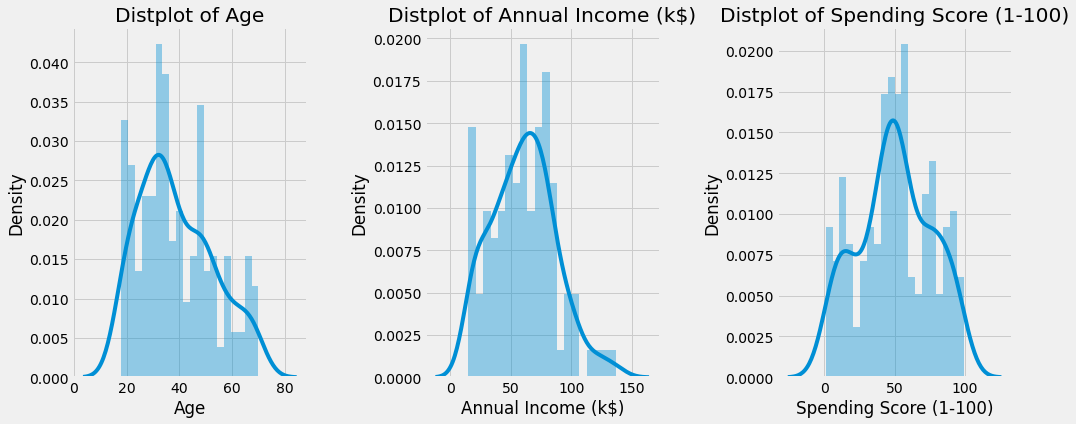

In [20]:
# Histograms
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
      n += 1
      plt.subplot(1, 3, n)
      plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
      sns.distplot(df[x], bins = 20)
      plt.title('Distplot of {}'.format(x))
plt.show()

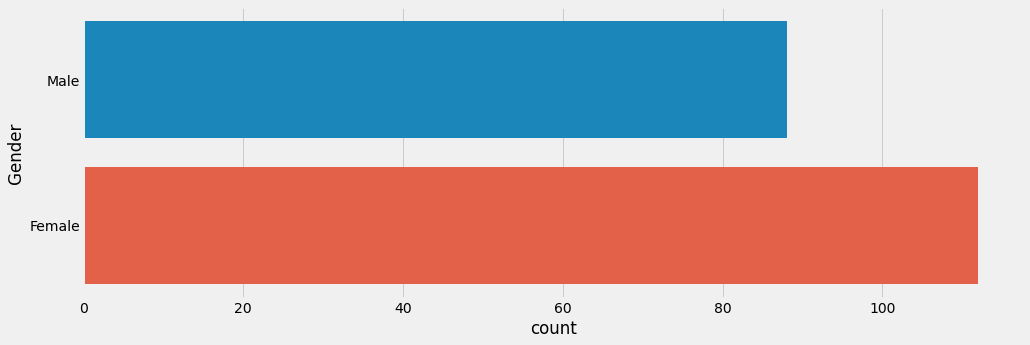

In [21]:
# Count plot of Gender
plt.figure(1, figsize = (15, 5))
sns.countplot(y = 'Gender', data = df)
plt.show()

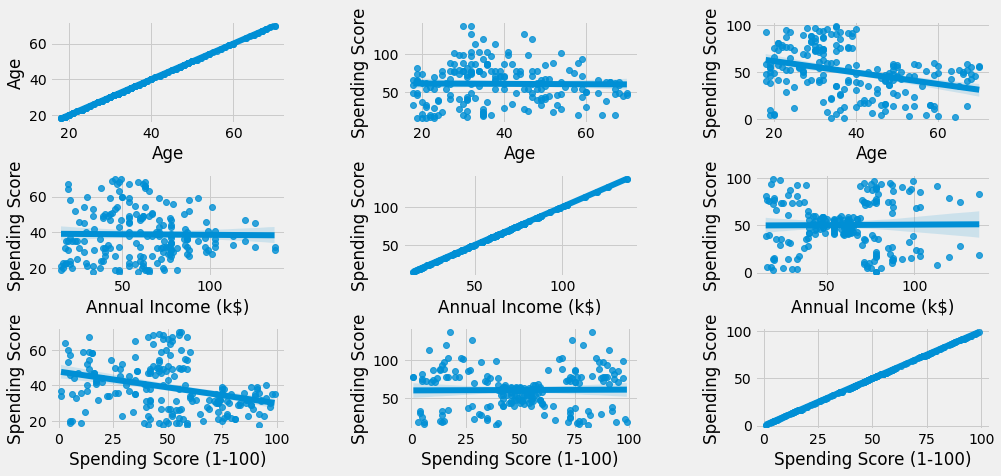

In [45]:
plt.figure(1, figsize = (15, 7))
plt.subplot(3, 3, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Age', y = 'Age',
            data = df)

plt.subplot(3, 3, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Age', y = 'Annual Income (k$)',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

plt.subplot(3, 3, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Age', y = 'Spending Score (1-100)',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

# 2nd row
plt.figure(1, figsize = (15, 7))
plt.subplot(3, 3, 4)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Annual Income (k$)', y = 'Age',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

plt.subplot(3, 3, 5)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Annual Income (k$)', y = 'Annual Income (k$)',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

plt.subplot(3, 3, 6)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

# 3rd row
plt.figure(1, figsize = (15, 7))
plt.subplot(3, 3, 7)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Spending Score (1-100)', y = 'Age',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

plt.subplot(3, 3, 8)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Spending Score (1-100)', y = 'Annual Income (k$)',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

plt.subplot(3, 3, 9)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
sns.regplot( x = 'Spending Score (1-100)', y = 'Spending Score (1-100)',
            data = df)
plt.ylabel(y.split()[0] + ' ' + y.split()[1])

plt.show()

In [38]:
len('Spending Score (1-100)'.split())

3

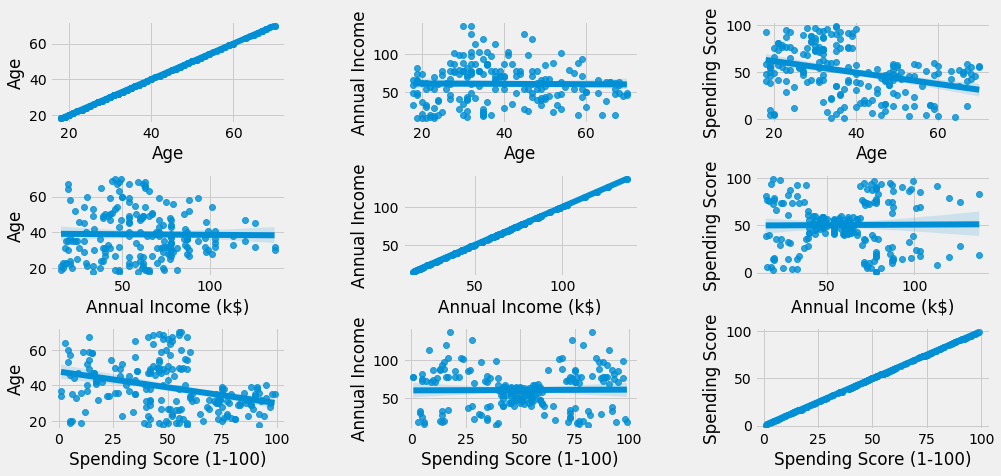

In [40]:
# Ploting the Relation between Age, Annual Income and spending score
plt.figure(1, figsize = (15, 7))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
      for y in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
          n += 1
          plt.subplot(3, 3, n)
          plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
          sns.regplot(x = x, y = y, data =df)
          plt.ylabel(y.split()[0] + ' ' + y.split()[1] if len(y.split()) > 1 else y)
plt.show()

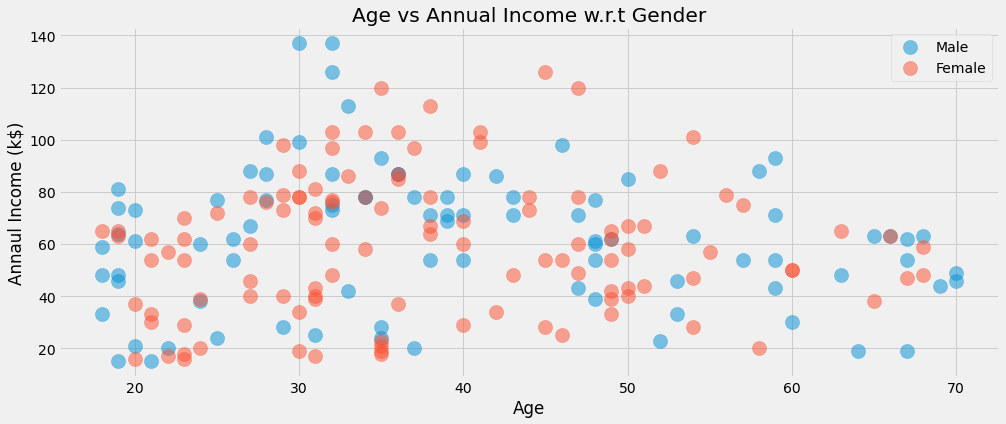

In [49]:
plt.figure(1, figsize = (15, 6))

plt.scatter( x = 'Age', y = 'Annual Income (k$)',
            data = df[df['Gender'] == 'Male'],
            s = 200,
            alpha = 0.5,
            label = 'Male'
            )
plt.xlabel('Age')
plt.ylabel('Annaul Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

plt.scatter( x = 'Age', y = 'Annual Income (k$)',
            data = df[df['Gender'] == 'Female'],
            s = 200,
            alpha = 0.5,
            label = 'Female'
            )
plt.xlabel('Age')
plt.ylabel('Annaul Income (k$)')
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()

plt.show()

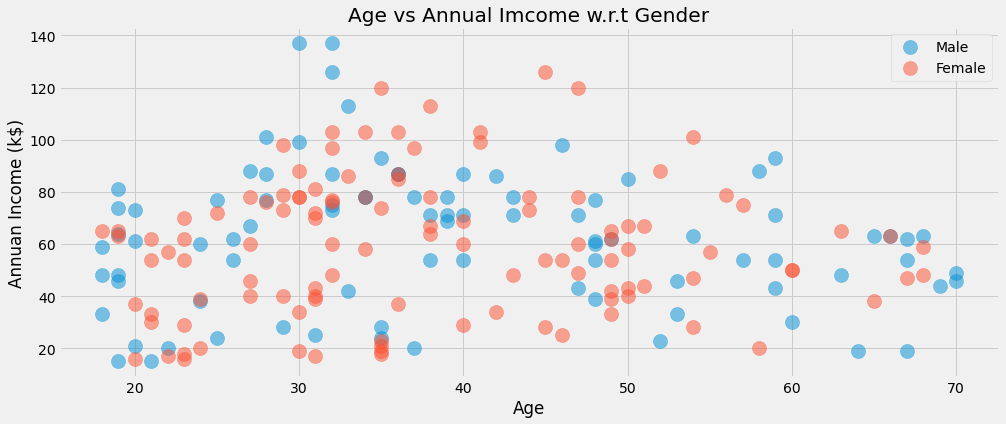

In [ ]:
plt.figure(1, figsize = (15, 6))

for gender in ['Male', 'Female']:
      plt.scatter(x = 'Age', y = 'Annual Income (k$)',
                  data = df[df['Gender'] == gender],
                  s = 200,
                  alpha = 0.5,
                  label = gender
                  )
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Imcome w.r.t Gender')
plt.legend() # 주석 표시
plt.show() 

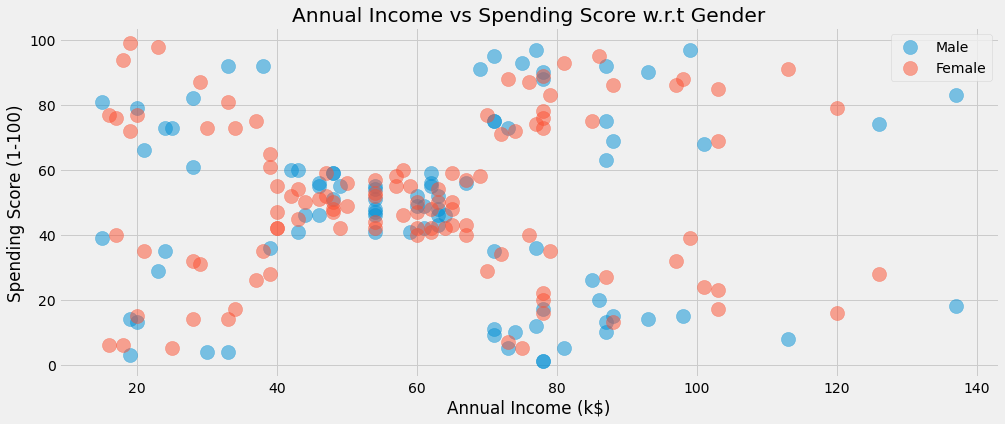

In [ ]:
plt.figure(1, figsize = (15, 6))

for gender in ['Male', 'Female']:
      plt.scatter(x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                  data  = df[df['Gender'] == gender],
                             s = 200,
                             alpha = 0.5,
                             label = gender
                  )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

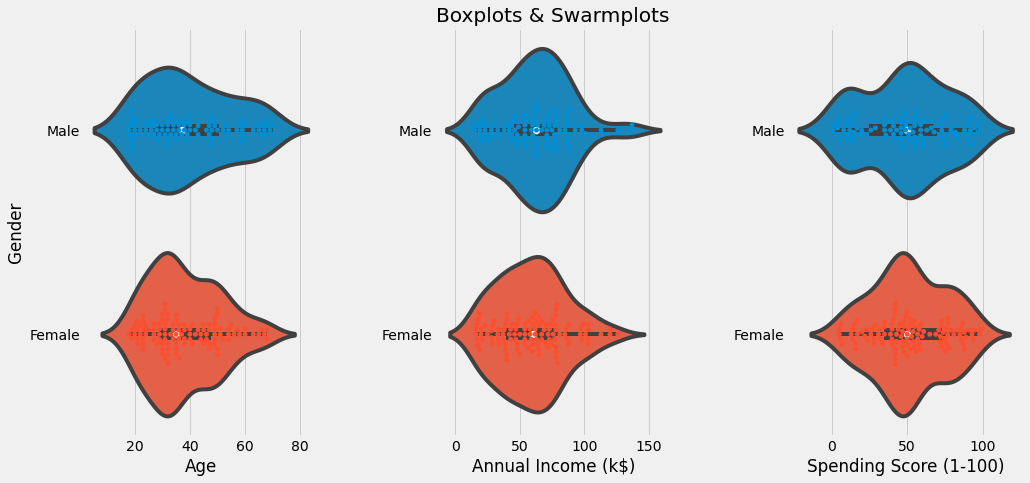

In [ ]:
# Distribution of values in Age, Annual Income and Spending Score according to Gender
plt.figure(1, figsize = (15, 7))
n = 0

for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
      n += 1
      plt.subplot(1, 3, n)
      plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
      sns.violinplot(x = cols, y = 'Gender',
                     data = df,
                     plaette = 'vlag'
                     )
      sns.swarmplot(x = cols, y = 'Gender', data = df)
      plt.ylabel('Gender' if n == 1 else '')
      plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

## Clustering and K-means 

#### 1. Segmentation using Age and Spending Score

In [61]:
'''Age and Spending Score'''
X1 = df[['Age', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []

for n in range(1, 11):
      algorithm = (KMeans(n_clusters = n, init = 'k-means++',
                         n_init = 10,
                         max_iter = 300,
                         tol = 0.0001,
                         random_state = 111,
                         algorithm = 'elkan')
                  )
      algorithm.fit(X1)
      inertia.append(algorithm.inertia_)

Selecting N Clusters based in Inertial (Squared Distance betwee Centroids and data points, should be less)

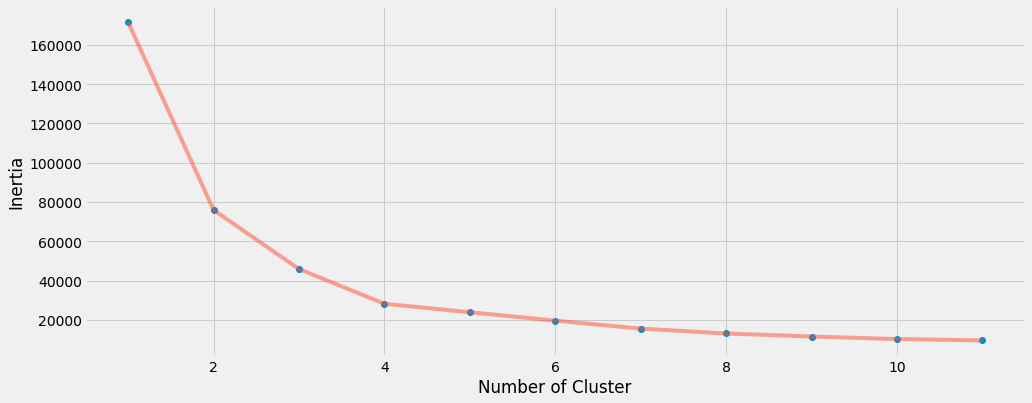

In [62]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 4,
                    init = 'k-means++',
                    n_init = 10,
                    max_iter = 300,
                    tol = 0.0001,
                    random_state = 111,
                    algorithm = 'elkan'
                    ))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, y_max, h),
                     np.arange(y_min, y_max, h)
                     )
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

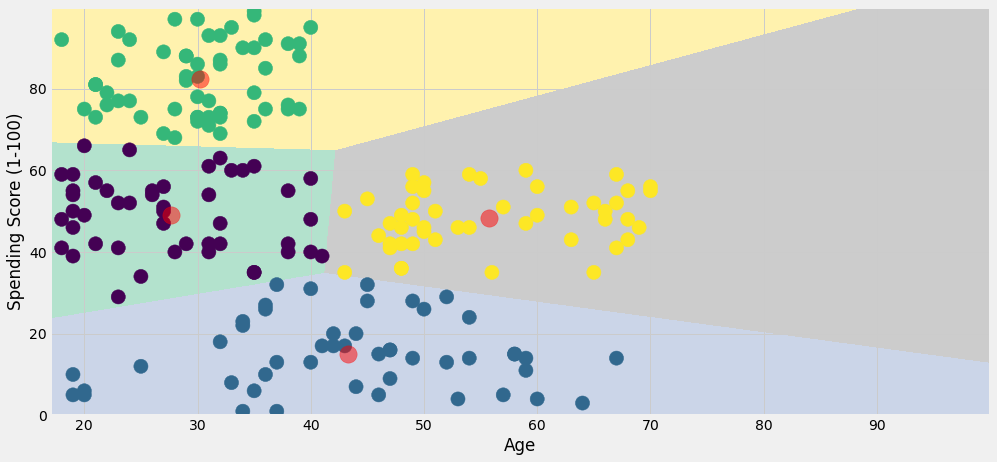

In [ ]:
# Visualize Classification result
plt.figure(1, figsize = (15, 7))
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2,
           aspect = 'auto',
           origin = 'lower'
           )
plt.scatter(x = 'Age', y = 'Spending Score (1-100)',
            data = df,
            c = labels1,
            s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1],
            s = 300,
            c = 'red',
            alpha = 0.5)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

### 2. Segmentation using Annual Income and Spending Score

In [ ]:
'''Annual Income and Spending Score'''
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[:,:].values
inertia = []

for n in range (1, 11):
      algorithm = (KMeans(n_clusters = n,
                          init = 'k-means++',
                          n_init = 10,
                          max_iter = 300,
                          tol = 0.0001,
                          random_state = 111,
                          algorithm = 'elkan'))
      algorithm.fit(X2)
      inertia.append(algorithm.inertia_)

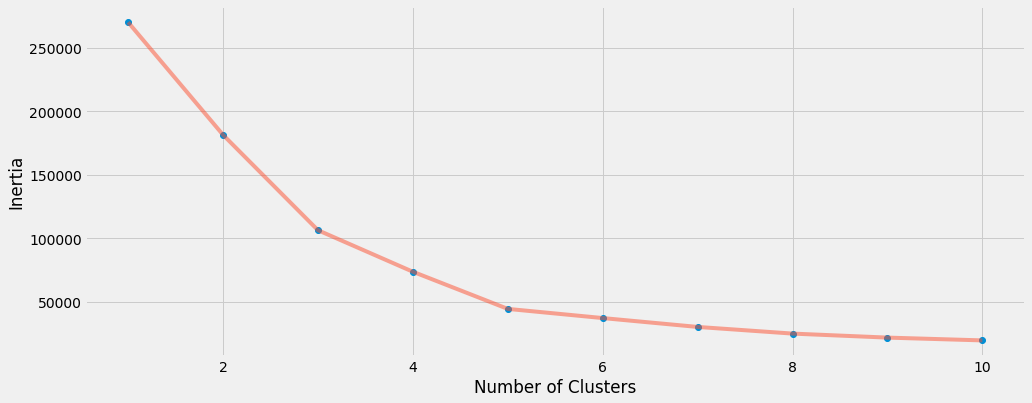

In [ ]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha = 0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()